# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

Download the `employees` dataset from [here](https://drive.google.com/file/d/1qiyQHmmntBsGHjlLSoSh9-t_R4UXOg_H/view?usp=sharing) and place it in the data folder

Load and save your dataset in a variable called `employees`.

In [2]:
# your code here
df = pd.read_csv("../data/employee.csv")
df.head(20)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1
# your code here
df_new = df[["Department", "Salary"]].groupby(df["Department"]).mean()
df_new

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2
# your code here
pd.pivot_table(df, index=["Department"], values=["Salary"],aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
# your code here
pd.pivot_table(df, index=["Department", "Title"], values=["Salary"],aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
# your code here
pd.pivot_table(df, index=["Title"], values=["Salary", "Years"],aggfunc=np.mean)

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [7]:
# your code here
pd.pivot_table(df, index=["Title"], values=["Salary", "Name"],aggfunc={"Salary":np.mean, "Name":len})

,Name,Salary
Title,,
VP,2,70.000000
analyst,4,32.500000
associate,3,56.666667


#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [8]:
# your code here
pd.pivot_table(df, index=["Department", "Title"], values=["Salary"],aggfunc=[np.median, np.min, np.max, np.std])

median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [9]:
"""
NaN values appear for HR Vp IT VP and IT Associate, this may be because there are only single instances for them, so it is impossible to calculate STD
"""

'\nNaN values appear for HR Vp IT VP and IT Associate, this may be because there are only single instances for them, so it is impossible to calculate STD\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
# your code here
pd.pivot_table(df, index=["Department", "Title"], values=["Salary"],aggfunc=[np.median, np.min, np.max, np.std], fill_value=0).fillna(0)

median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [11]:
# your code here
pd.pivot_table(df, index=["Department"], values=["Name", "Salary"],aggfunc={"Name":len, "Salary":np.sum})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [47]:
df.sample(2)

,Name,Department,Education,Gender,Title,Years,Salary
8,Ana,HR,Master,F,VP,8,70
3,Sonia,HR,Bachelor,F,analyst,4,35


In [49]:
# your code here
pd.pivot_table(df, index=["Department", "Title"], values=["Years", "Salary"],aggfunc={"Name":len,"Salary":np.sum})
#paolo: cell gives error here-could you check?

SpecificationError: Column(s) ['Name'] do not exist

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [13]:
# your code here

# Challenge 2

Read the `fitbit` dataset from
[here](https://drive.google.com/file/d/1V3A0sRLmAb6BDFoZBIrjUOMl5Ap9wSts/view?usp=sharing) and place it in the data folder


Save your data in a variable called `fitbit`.

In [14]:
# your code here
df2 = pd.read_csv('../data/fitbit.csv')
df2.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [15]:
# your code here
df2.describe()
df2.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [16]:
# your code here
df2["Minutes Very Active"].corr(df2["Steps"])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [17]:
import matplotlib.pyplot as plt;

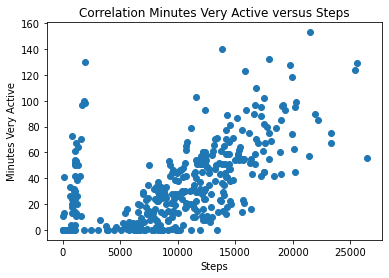

In [18]:
plt.scatter(df2["Steps"], df2["Minutes Very Active"])
plt.title("Correlation Minutes Very Active versus Steps")
plt.xlabel("Steps")
plt.ylabel("Minutes Very Active")
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [19]:
"""
The scatterplot shows a positive relationship between Minutes Very Active and Steps. The correlation is not very strong as there are some outliers too. For example the steep line at x = 0 shows that very active minutes could also involve very little steps being taken. This could for example be a different type of activity that does not involve steps.
"""

'\nThe scatterplot shows a positive relationship between Minutes Very Active and Steps. The correlation is not very strong as there are some outliers too. For example the steep line at x = 0 shows that very active minutes could also involve very little steps being taken. This could for example be a different type of activity that does not involve steps.\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [20]:
# your code here
df2["Minutes Sedentary"].corr(df2["Steps"])

0.07690608062990094

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

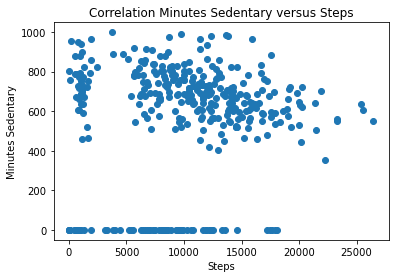

In [21]:
# your code here
plt.scatter(df2["Steps"], df2["Minutes Sedentary"])
plt.title("Correlation Minutes Sedentary versus Steps")
plt.xlabel("Steps")
plt.ylabel("Minutes Sedentary")
plt.show()

In [22]:
"""
There are no clear indications of a correlation between the two variables as the scatterplot shows large variance in the plotted data. 
"""

'\nThere are no clear indications of a correlation between the two variables as the scatterplot shows large variance in the plotted data. \n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [23]:
# your code here
df2["MinutesOfSleep"].corr(df2["Steps"])

0.13098565950836386

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

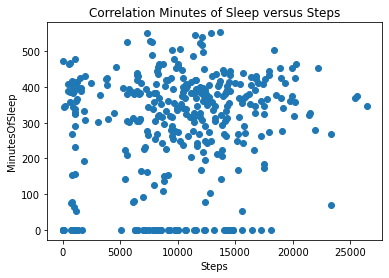

In [24]:
# your code here
plt.scatter(df2["Steps"], df2["MinutesOfSleep"])
plt.title("Correlation Minutes of Sleep versus Steps")
plt.xlabel("Steps")
plt.ylabel("MinutesOfSleep")
plt.show()

In [25]:
"""
your commments here
"""

'\nyour commments here\n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [26]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [27]:
# your code here
cor_fit = df2[columns]
cor_fit.corr()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [28]:
# your code here
cor_fit.corr().sort_values('Steps', ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

Read the `time_grades` dataset from 
[here](https://drive.google.com/file/d/1zKAqZPjLnU96cvfMzqfFz-hH6YxCNVKN/view?usp=sharing) and place it in the data folder


Save your data in a variable called `time_grades`.

In [29]:
# your code here
df3 = pd.read_csv('../data/time_grades.csv')
df3.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

(array([1., 0., 1., 0., 0., 2., 0., 1., 0., 0., 1., 0., 0., 0., 0., 4., 0.,
        2., 0., 3.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 20 artists>)

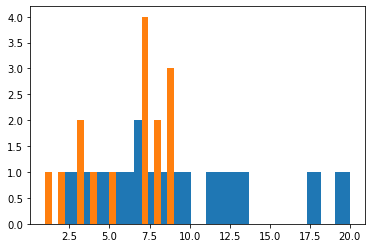

In [30]:
# your code here
from matplotlib import pyplot as plt
x = df3["Study time"]
kwargs = dict(alpha=1, bins=20)
plt.hist(x, **kwargs)

y = df3["Grade"]
plt.hist(y, **kwargs)
#paolo: not exactly-check solutions

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [31]:
# your code here
print(df3["Study time"].corr(df3["Grade"], method='spearman'))
print(df3["Study time"].corr(df3["Grade"]))

0.819658753036942
0.7980456073578857


In [32]:
"""
The correlations are close but the spearman correlation indicates a slightly higher correlation 
"""

'\nThe correlations are close but the spearman correlation indicates a slightly higher correlation \n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

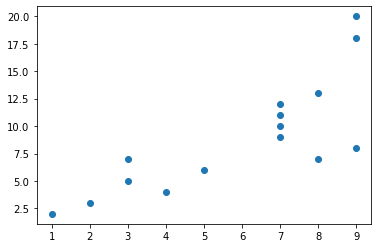

In [33]:
# your code here
y = df3["Study time"]
x = df3["Grade"]
plt.scatter(x,y)
#paolo: good plot-remember the labels on the axes

In [34]:
"""
There seems to be a positive correlation between the time studied and the grade received. Meaning that the more time is studied, the higher the grade tends to get
"""


'\nThere seems to be a positive correlation between the time studied and the grade received. Meaning that the more time is studied, the higher the grade tends to get\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [35]:
"""
The calculations of the correlations differ. The Pearson correlation is based on the actual raw data, whereas the Spearman correlation is based on the ranked values. 
"""

'\nThe calculations of the correlations differ. The Pearson correlation is based on the actual raw data, whereas the Spearman correlation is based on the ranked values. \n'

In [50]:
#paolo: good work-one cell gives error-could you check?